## Perceptron Learning Algorithm

The perceptron is a simple supervised machine learning algorithm and one of the earliest neural network architectures. It was introduced by Rosenblatt in the late 1950s. A perceptron represents a binary linear classifier that maps a set of training examples (of $d$ dimensional input vectors) onto binary output values using a $d-1$ dimensional hyperplane. But Today, we will implement **Multi-Classes Perceptron Learning Algorithm**
**Given:**
* dataset $\{(x^i, y^i)\}$, $i \in (1, M)$
* $x^i$ is $d$ dimension vector, $x^i = (x^i_1, \dots x^i_d)$
* $y^i$ is multi-class target varible $y^i \in \{0,1,2\}$

A perceptron is trained using gradient descent. The training algorithm has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step0:** Initial the weight vector and bias with zeros     
**Step1:** Compute the linear combination of the input features and weight. $y^i_{pred} = \arg\max_k W_k*x^i + b_k ,for each class k\in{0,1,2}$    
**Step2:** Compute the gradients for parameters $W_k$, $b_k$. **Derive the parameter update equation Here (5 points)**   

##################################     
**My Answer:**

We begin by noting that the prediction for a given input $x^i$ is made as follows:

$
\hat{y} = \arg\max_{k \in \{0,1,2\}} \left( W_k \cdot x^i + b_k \right)
$

If the prediction $\hat{y}$ is correct (i.e. $\hat{y} = y^i$), no update is made. However, if the prediction is incorrect (i.e. $\hat{y} \neq y^i$), we want to adjust the weights and biases so that the score for the true class increases and the score for the incorrect (predicted) class decreases.

One common way to view this is by considering a loss function that reflects the misclassification. One formulation is to use the following (non-differentiable) loss for a single example:

$
L(W, b; x^i, y^i) = \max\Big(0,\; \big[W_{\hat{y}} \cdot x^i + b_{\hat{y}}\big] - \big[W_{y^i} \cdot x^i + b_{y^i}\big] \Big)
$

For the case when $\hat{y} \neq y^i$ (i.e. the loss is positive), we can compute the subgradients with respect to the parameters of the involved classes:

- **For the correct class $y^i$:**
  - $\frac{\partial L}{\partial W_{y^i}} = -x^i$
  - $\frac{\partial L}{\partial b_{y^i}} = -1$

- **For the misclassified (predicted) class $\hat{y}$:**
  - $\frac{\partial L}{\partial W_{\hat{y}}} = x^i$
  - $\frac{\partial L}{\partial b_{\hat{y}}} = 1$

- **For all other classes $k$ (where $k \neq y^i$ and $k \neq \hat{y}$)**, the gradients are zero.

Using gradient descent with a learning rate $\eta$, we update the parameters by moving in the negative direction of the gradient. Thus, the update equations are:

- **For the true class $y^i$:**
  $
  W_{y^i} \leftarrow W_{y^i} - \eta \left(-x^i\right) = W_{y^i} + \eta x^i
  $
  $
  b_{y^i} \leftarrow b_{y^i} - \eta \left(-1\right) = b_{y^i} + \eta
  $

- **For the predicted (incorrect) class $\hat{y}$:**
  $
  W_{\hat{y}} \leftarrow W_{\hat{y}} - \eta \left(x^i\right) = W_{\hat{y}} - \eta x^i
  $
  $
  b_{\hat{y}} \leftarrow b_{\hat{y}} - \eta \left(1\right) = b_{\hat{y}} - \eta
  $

- **For any other class $k$ not involved in the misclassification (i.e. $k \neq y^i$ and $k \neq \hat{y}$)**, the parameters remain unchanged.

In summary, the parameter update rule for a misclassified example is:

$
\begin{aligned}
W_{y^i} &\leftarrow W_{y^i} + \eta\, x^i, \quad &b_{y^i} &\leftarrow b_{y^i} + \eta, \\
W_{\hat{y}} &\leftarrow W_{\hat{y}} - \eta\, x^i, \quad &b_{\hat{y}} &\leftarrow b_{\hat{y}} - \eta.
\end{aligned}
$

This update increases the score for the correct class while decreasing the score for the incorrect class, guiding the perceptron toward making the right classification in subsequent iterations.
#################################
                              
                        

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
# newer version sklearn change the name of cross_validation
import matplotlib.pyplot as plt
import random

np.random.seed(0)
random.seed(0)

In [2]:
iris = datasets.load_iris()
X = iris.data
print(type(X))
y = iris.target
y = np.array(y)
print('X_Shape:', X.shape)
print('y_Shape:', y.shape)
print('Label Space:', np.unique(y))

<class 'numpy.ndarray'>
X_Shape: (150, 4)
y_Shape: (150,)
Label Space: [0 1 2]


In [3]:
## split the training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
print('X_train_Shape:', X_train.shape)
print('X_test_Shape:',  X_test.shape)
print('y_train_Shape:', y_train.shape)
print('y_test_Shape:',  y_train.shape)

print(type(y_train))



X_train_Shape: (105, 4)
X_test_Shape: (45, 4)
y_train_Shape: (105,)
y_test_Shape: (105,)
<class 'numpy.ndarray'>


epoch: 0 traing_acc:0.752 tst_acc:0.911
epoch: 1 traing_acc:0.905 tst_acc:0.911
epoch: 2 traing_acc:0.943 tst_acc:0.978
epoch: 3 traing_acc:0.914 tst_acc:0.978
epoch: 4 traing_acc:0.905 tst_acc:0.978
epoch: 5 traing_acc:0.924 tst_acc:0.978
epoch: 6 traing_acc:0.990 tst_acc:0.978
epoch: 7 traing_acc:0.914 tst_acc:0.978
epoch: 8 traing_acc:0.962 tst_acc:0.978
epoch: 9 traing_acc:0.905 tst_acc:0.956
epoch: 10 traing_acc:0.952 tst_acc:0.978
epoch: 11 traing_acc:0.962 tst_acc:0.978
epoch: 12 traing_acc:0.952 tst_acc:0.956
epoch: 13 traing_acc:0.952 tst_acc:0.978
epoch: 14 traing_acc:0.971 tst_acc:0.956
epoch: 15 traing_acc:0.962 tst_acc:0.933
epoch: 16 traing_acc:0.933 tst_acc:0.978
epoch: 17 traing_acc:0.981 tst_acc:0.978
epoch: 18 traing_acc:0.971 tst_acc:0.978
epoch: 19 traing_acc:0.981 tst_acc:0.978
epoch: 20 traing_acc:0.962 tst_acc:0.978
epoch: 21 traing_acc:0.943 tst_acc:0.956
epoch: 22 traing_acc:0.971 tst_acc:0.933
epoch: 23 traing_acc:0.943 tst_acc:0.956
epoch: 24 traing_acc:0.971

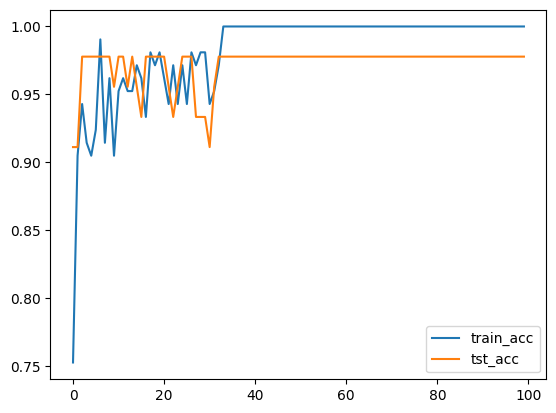

In [16]:
class MultiClsPLA(object):

    ## We recommend to absorb the bias into weight.  W = [w, b]

    def __init__(self, X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls):
        super(MultiClsPLA, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.weight = self.initial_weight(weight_dimension, num_cls)
        self.sample_mean = np.mean(self.X_train, 0)
        self.sample_std = np.std(self.X_train, 0)
        self.num_epoch = num_epoch
        self.lr = lr
        self.total_acc_train = []
        self.total_acc_tst = []

    def initial_weight(self, weight_dimension, num_cls):
        # weight = None
        #########################################
        ##  ToDO: Initialize the weight with   ##
        ##  small std and zero mean gaussian   ##
        #########################################
        weight = np.random.normal(loc=0.0, scale=0.01, size=(num_cls, weight_dimension))
        return weight

    def data_preprocessing(self, data):
        #####################################
        ##  ToDO: Normlize the data        ##
        #####################################
        norm_data = (data-self.sample_mean)/self.sample_std
        return norm_data

    def train_step(self, X_train, y_train, shuffle_idx):
        # np.random.shuffle(shuffle_idx)
        # X_train = X_train[shuffle_idx]
        # y_train = y_train[shuffle_idx]
        # train_acc = None
        np.random.shuffle(shuffle_idx)
        X_train = X_train[shuffle_idx]
        y_train = y_train[shuffle_idx]
        correct = 0
        n = X_train.shape[0]
        ##############################################
        ## TODO: to implement the training process  ##
        ## and update the weights                   ##
        ##############################################

        for i in range(n):
            x = X_train[i]
            true_label = y_train[i]
            scores = np.dot(self.weight, x)
            predicted_label = np.argmax(scores)
            if predicted_label == true_label:
                correct += 1
            else:
                self.weight[true_label] += self.lr * x
                self.weight[predicted_label] -= self.lr * x
        train_acc = correct / n

        return train_acc

    def test_step(self, X_test, y_test):
        # X_test = self.data_preprocessing(data=X_test)
        # num_sample = X_test.shape[0]
        # test_acc = None

        #########################################
        ##  ToDO: Evaluate the test set and    ##
        ##  return the test acc                ##
        #########################################
        X_test = self.data_preprocessing(data=X_test)
        X_test = np.concatenate([X_test, np.ones((X_test.shape[0], 1))], axis=1)
        num_sample = X_test.shape[0]
        scores = np.dot(self.weight, X_test.T)
        y_pred = np.argmax(scores, axis=0)
        correct = np.sum(y_pred == y_test)
        test_acc = correct / num_sample

        return test_acc

    def train(self):
        self.X_train = self.data_preprocessing(data=self.X_train)
        self.X_train = np.concatenate([self.X_train, np.ones((self.X_train.shape[0], 1))], axis=1)
        num_sample = self.X_train.shape[0]
        # self.X_train = self.data_preprocessing(data=self.X_train)
        # num_sample = self.X_train.shape[0]

        ######################################################
        ### TODO: In order to absorb the bias into weights ###
        ###  we need to modify the input data.             ###
        ###  So You need to transform the input data       ###
        ######################################################


        shuffle_index = np.array(range(0, num_sample))
        for epoch in range(self.num_epoch):
            training_acc = self.train_step(X_train=self.X_train, y_train=self.y_train, shuffle_idx=shuffle_index)
            tst_acc = self.test_step(X_test=self.X_test,  y_test=self.y_test)
            self.total_acc_train.append(training_acc)
            self.total_acc_tst.append(tst_acc)
            print('epoch:', epoch, 'traing_acc:%.3f'%training_acc, 'tst_acc:%.3f'%tst_acc)

    def vis_acc_curve(self):
        train_acc = np.array(self.total_acc_train)
        tst_acc = np.array(self.total_acc_tst)
        plt.plot(train_acc)
        plt.plot(tst_acc)
        plt.legend(['train_acc', 'tst_acc'])
        plt.show()


np.random.seed(0)
random.seed(0)
#######################################################
### TODO:
### 1. You need to import the model and pass some parameters.
### 2. Then training the model with some epoches.
### 3. Visualize the training acc and test acc verus epoches

lr = 0.01
num_epoch = 100

weight_dimension = X_train.shape[1] + 1
num_cls = len(np.unique(y_train))

model = MultiClsPLA(X_train, y_train, X_test, y_test, lr, num_epoch, weight_dimension, num_cls)
model.train()
model.vis_acc_curve()